In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_2006=pd.read_csv("2006.csv", usecols = ["Origin", "Dest", "Year"], encoding='latin-1')   # loading the required datasets for analysis
                                                                                             # note the same encoding has been used for both dataframes
df_2007=pd.read_csv("2007.csv", usecols = ["Origin", "Dest", "Year"], encoding='latin-1')    

In [3]:
df_2006  #exploring dataset

,Year,Origin,Dest
0,2006,ATL,PHX
1,2006,ATL,PHX
2,2006,ATL,PHX
3,2006,AUS,PHX
4,2006,AUS,PHX
...,...,...,...
7141917,2006,ATL,EWR
7141918,2006,SEA,ATL
7141919,2006,ATL,MCO
7141920,2006,SLC,SJC


In [4]:
df_2007  # exploring dataset

,Year,Origin,Dest
0,2007,SMF,ONT
1,2007,SMF,PDX
2,2007,SMF,PDX
3,2007,SMF,PDX
4,2007,SMF,PDX
...,...,...,...
7453210,2007,MCO,ATL
7453211,2007,ATL,SLC
7453212,2007,LAX,ATL
7453213,2007,DFW,ATL


In [5]:
# group both dataframes by 'Origin' and 'Destination'
# let us also rename the 'Year' column with the respective year in both dataframes for further analysis purposes
df_2006 = df_2006.groupby(['Origin','Dest']).count().sort_values(by=['Year'], ascending=False)
df_2006=df_2006.rename(columns={'Year': '2006'})  
df_2007 = df_2007.groupby(['Origin','Dest']).count().sort_values(by=['Year'], ascending=False)
df_2007=df_2007.rename(columns={'Year': '2007'})

In [6]:
df_2006 # exploring dataframe

,,2006
Origin,Dest,
SAN,LAX,14594
LAX,SAN,14554
OGG,HNL,13956
HNL,OGG,13898
LAX,LAS,13547
...,...,...
BZN,GJT,1
ORD,GTF,1
IAD,DCA,1


In [7]:
df_2007    # exploring dataframe

,,2007
Origin,Dest,
OGG,HNL,16099
HNL,OGG,15876
LAX,LAS,14385
LAS,LAX,13815
HNL,LIH,13156
...,...,...
RDD,SJC,1
DEN,PIH,1
MDW,LGA,1


In [8]:
# lets merge df_2006 and df_2007 on columns 'Origin' and 'Destination'
df_travel=pd.merge(df_2006,df_2007,on=['Origin','Dest'],how='left')

In [9]:
df_travel # explore dataframe

,,2006,2007
Origin,Dest,,
SAN,LAX,14594,12779.0
LAX,SAN,14554,12767.0
OGG,HNL,13956,16099.0
HNL,OGG,13898,15876.0
LAX,LAS,13547,14385.0
...,...,...,...
BZN,GJT,1,2.0
ORD,GTF,1,NaN
IAD,DCA,1,NaN


In [10]:
# check df_travel for null values
df_travel.isna().sum()

2006      0
2007    481
dtype: int64

In [11]:
# we see some Nan values , we are going to replace these nan values with 0 indicating there have been no flights to and from these airports
df_travel=df_travel.replace(np.nan,0)

In [12]:
# check for null values again
df_travel.isna().sum()

2006    0
2007    0
dtype: int64

In [13]:
#create a new column called 'Total Flight Count' were we are getting the sum of  columns '2006' and '2007'
df_travel['Total Flight Count']=df_travel['2006'] + df_travel['2007']
# sorting the arrangement in the dataframe by descending order of the total flight count
df_travel=df_travel.sort_values(by='Total Flight Count',ascending=False).reset_index(drop=False)
df_travel # explore dataframe

,Origin,Dest,2006,2007,Total Flight Count
0,OGG,HNL,13956,16099.0,30055.0
1,HNL,OGG,13898,15876.0,29774.0
2,LAX,LAS,13547,14385.0,27932.0
3,SAN,LAX,14594,12779.0,27373.0
4,LAX,SAN,14554,12767.0,27321.0
...,...,...,...,...,...
4894,PDX,TPA,1,0.0,1.0
4895,PDX,TWF,1,0.0,1.0
4896,FAR,GJT,1,0.0,1.0
4897,JFK,TYS,1,0.0,1.0


In [14]:
# lets create a new dataframe with the top 10 locations according to total flight count
df_10=df_travel.loc[0:9]

In [15]:
df_10 # explore dataset

,Origin,Dest,2006,2007,Total Flight Count
0,OGG,HNL,13956,16099.0,30055.0
1,HNL,OGG,13898,15876.0,29774.0
2,LAX,LAS,13547,14385.0,27932.0
3,SAN,LAX,14594,12779.0,27373.0
4,LAX,SAN,14554,12767.0,27321.0
5,LAS,LAX,13122,13815.0,26937.0
6,BOS,LGA,12370,12263.0,24633.0
7,LIH,HNL,11602,13030.0,24632.0
8,LGA,BOS,12398,12222.0,24620.0
9,HNL,LIH,11235,13156.0,24391.0


In [16]:
# define a condition to identify routes of travel
def condition (x):
    if x['Origin'] == 'OGG' and x['Dest'] == 'HNL':
        return 'OGG & HNL'
    if x['Origin'] == 'HNL' and x['Dest'] == 'OGG':
        return 'HNL & OGG'
    if x['Origin'] == 'LAX' and x['Dest'] == 'LAS':
        return 'LAX & LAS'
    if x['Origin'] == 'SAN' and x['Dest'] == 'LAX':
        return 'SAN & LAX'
    if x['Origin'] == 'LAX' and x['Dest'] == 'SAN':
        return 'LAX & SAN'
    if x['Origin'] == 'LAS' and x['Dest'] == 'LAX':
        return 'LAS & LAX'
    if x['Origin'] == 'BOS' and x['Dest'] == 'LGA':
        return 'BOS & LGA'
    if x['Origin'] == 'LIH' and x['Dest'] == 'HNL':
        return 'LIH & HNL'
    if x['Origin'] == 'LGA' and x['Dest'] == 'BOS':
        return 'LGA & BOS'
    if x['Origin'] == 'HNL' and x['Dest'] == 'LIH':
        return 'HNL & LIH'
    
    
# creating a new column called 'Route'
df_10['Route']=df_10.apply(lambda x : condition (x),axis=1)
 
 

C:\Users\Ibrahim Hameem\AppData\Local\Temp\ipykernel_8032\3947800466.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10['Route']=df_10.apply(lambda x : condition (x),axis=1)


In [17]:
df_10 #explore dataset

,Origin,Dest,2006,2007,Total Flight Count,Route
0,OGG,HNL,13956,16099.0,30055.0,OGG & HNL
1,HNL,OGG,13898,15876.0,29774.0,HNL & OGG
2,LAX,LAS,13547,14385.0,27932.0,LAX & LAS
3,SAN,LAX,14594,12779.0,27373.0,SAN & LAX
4,LAX,SAN,14554,12767.0,27321.0,LAX & SAN
5,LAS,LAX,13122,13815.0,26937.0,LAS & LAX
6,BOS,LGA,12370,12263.0,24633.0,BOS & LGA
7,LIH,HNL,11602,13030.0,24632.0,LIH & HNL
8,LGA,BOS,12398,12222.0,24620.0,LGA & BOS
9,HNL,LIH,11235,13156.0,24391.0,HNL & LIH


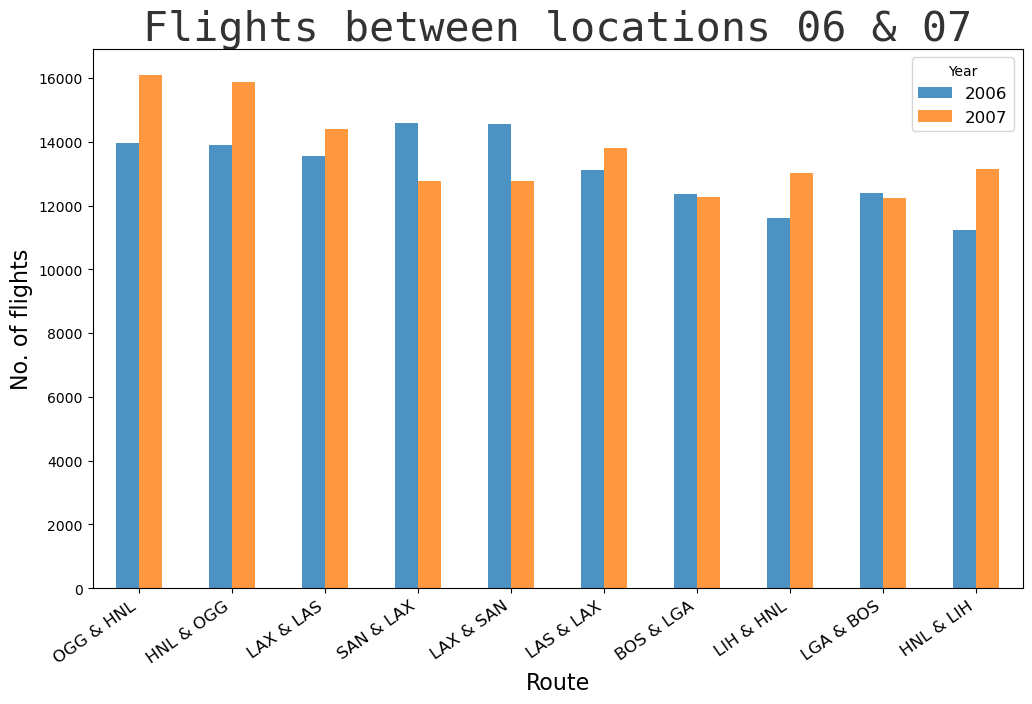

In [18]:
# plotting a bar graph to view the flights between routes
data=df_10[['Route','2006','2007']]


#plot
f,ax=plt.subplots(figsize=(12,7))
data.set_index('Route').plot(kind='bar',stacked=False,ax=ax, alpha=.8)
ax.legend(loc='upper right', title='Year', fontsize=12) 
ax.set_title('Flights between locations 06 & 07', fontsize=30, fontname="Monospace", alpha=.8)
ax.set_xlabel(xlabel='Route',fontsize=16) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right", fontsize = 12) 
ax.set_ylabel('No. of flights', fontsize=16) 

plt.savefig("Flight count between routes for 06 & 07.png")
plt.show()

In [19]:
# analyzing the change in flight counts  over the year 2006 and 2007#


In [20]:
#loading the required datasets
df=pd.read_csv('clean_data.csv')
airports_df=pd.read_csv('airports.csv')

In [21]:
# exploring datasets
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743,745,1024,1018,US,343,...,1587,45,13,0,0,0,0,0,0,0
1,2006,1,11,3,1053,1053,1313,1318,US,613,...,1587,27,19,0,0,0,0,0,0,0
2,2006,1,11,3,1915,1915,2110,2133,US,617,...,1587,4,11,0,0,0,0,0,0,0
3,2006,1,11,3,1753,1755,1925,1933,US,300,...,872,16,10,0,0,0,0,0,0,0
4,2006,1,11,3,824,832,1015,1015,US,765,...,872,27,12,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14268923,2007,12,15,6,1558,1605,1749,1736,DL,58,...,403,14,17,0,0,0,0,0,0,0
14268924,2007,12,15,6,1902,1851,2110,2105,DL,59,...,1589,6,21,0,0,0,0,0,0,0
14268925,2007,12,15,6,1024,1025,1750,1735,DL,61,...,1946,14,19,0,0,0,0,15,0,0
14268926,2007,12,15,6,1353,1315,1658,1622,DL,62,...,732,11,14,0,0,0,0,0,0,36


In [22]:
airports_df

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...
3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


In [23]:
# iata in airports_df dataset refers to origin iata airport code therefore we can rename that column as 'Origin'
airports_df.rename(columns={'iata': 'Origin'},inplace=True)
#creating a new dataframe with the required columns for analysis from airports_df and calling it airports_df
airports_df=airports_df.loc[:,['Origin','state']]

# creating a new a dataframe with the required columns for analysis from df and calling it df
df=df.loc[:,['Year','Month','Origin','Dest']]


In [24]:
#checking the data in the dataframes
airports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Origin  3376 non-null   object
 1   state   3364 non-null   object
dtypes: object(2)
memory usage: 52.9+ KB


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14268928 entries, 0 to 14268927
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Year    int64 
 1   Month   int64 
 2   Origin  object
 3   Dest    object
dtypes: int64(2), object(2)
memory usage: 435.5+ MB


In [26]:
# now we can merge both airports_df and df on column 'Origin'
df_merge= pd.merge(airports_df,df,on='Origin',how='inner')
df_merge.isna().sum() # looking for null values in the merged dataframe


Origin       0
state     9925
Year         0
Month        0
Dest         0
dtype: int64

In [27]:
#we can see that 'state' has null values and these need to be dropped
df_merge.dropna(inplace=True)
df_merge.isna().sum()  # we see all null values have been removed

Origin    0
state     0
Year      0
Month     0
Dest      0
dtype: int64

In [28]:
df_group = df_merge.groupby(["Year", "Month"]).size().reset_index().rename({0:"Flight_Count"}, axis = 1)

In [29]:
df_group # explore dataset

,Year,Month,Flight_Count
0,2006,1,569235
1,2006,2,517839
2,2006,3,595610
3,2006,4,576744
4,2006,5,593694
5,2006,6,585254
6,2006,7,607479
7,2006,8,616085
8,2006,9,572786
9,2006,10,598153


In [30]:
df_group['Month']=df_group['Month'].astype(int) # ensuring the elements in 'Month' are integers for further analysis
df['Month'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14268928 entries, 0 to 14268927
Series name: Month
Non-Null Count     Dtype
--------------     -----
14268928 non-null  int64
dtypes: int64(1)
memory usage: 108.9 MB


In [31]:
# define a condition to identify a month into a quarter of the year
def condition(x):
    if x<4:
        return 'Q1'
    if x>=4 and x<7:
        return 'Q2'
    if x>=7 and x<10:
        return 'Q3'
    else:
        return 'Q4'
    
     
        
df_group['Quarter']=df_group['Month'].apply(lambda x:condition(x)) # apply the condition on 'Month' and obtain 'Quarter'

In [32]:
df_group # explore dataframe

,Year,Month,Flight_Count,Quarter
0,2006,1,569235,Q1
1,2006,2,517839,Q1
2,2006,3,595610,Q1
3,2006,4,576744,Q2
4,2006,5,593694,Q2
5,2006,6,585254,Q2
6,2006,7,607479,Q3
7,2006,8,616085,Q3
8,2006,9,572786,Q3
9,2006,10,598153,Q4


In [41]:
df_group=df_group.groupby(['Year','Quarter']).sum()  # group df by 'Year' and "Quarter" and obtain the total sum of flight count for each year



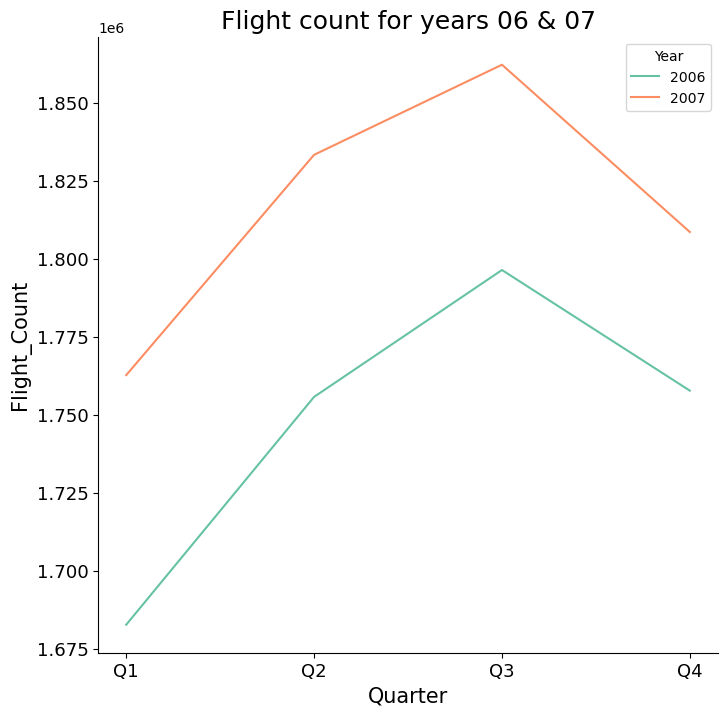

In [42]:
# Line plot for change between years
fig, ax = plt.subplots(1, 1, figsize = (8, 8))

sns.lineplot(x= "Quarter", y = "Flight_Count", data = df_group, palette='Set2'
          , hue = "Year")

ax.set_ylabel("Flight_Count",
               size = 15)

ax.set_xlabel("Quarter",
                 size = 15)

ax.set_title("Flight count for years 06 & 07",
                size = 18)

ax.tick_params(axis='y', labelsize=13)
ax.tick_params(axis='x', labelsize=13)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig(" Flight count for years 06 & 07.png")
plt.show()